##### <p style="background-color:coral;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">EXPLORATIVE DATA ANALYSIS</p>

In [97]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [98]:
# Import data

data = pd.read_csv('olympics_cleaned_v4.csv')

In [99]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219085 entries, 0 to 219084
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       219085 non-null  int64  
 1   Name     219085 non-null  object 
 2   Sex      219085 non-null  object 
 3   Age      210810 non-null  float64
 4   Height   170149 non-null  float64
 5   Weight   168197 non-null  float64
 6   NOC      219085 non-null  object 
 7   Year     219085 non-null  int64  
 8   Sport    219085 non-null  object 
 9   Event    219085 non-null  object 
 10  Medal    33610 non-null   object 
 11  country  219064 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 20.1+ MB


Dataframe has 219085 rows und 12 columns. We can see that the columns 'Age', 'Height', 'Weight', 'Medal', 'country' have some NaN-values.

In [100]:
# Sum of NaN values per columns
print('Sum of NaN-values in each column:')
overall_nan_counts = data.isna().sum()
overall_nan_counts


Sum of NaN-values in each column:


ID              0
Name            0
Sex             0
Age          8275
Height      48936
Weight      50888
NOC             0
Year            0
Sport           0
Event           0
Medal      185475
country        21
dtype: int64

In [101]:
# Set NaN-values in medal to 0

data['Medal'] = data['Medal'].fillna(0)

In [102]:
# Sum of NaN values per rows
nan_counts_per_row = data.isna().sum(axis=1)
data['nan_counts'] = nan_counts_per_row

# Set 1 for each NaN row
data['nan_row'] = data['nan_counts'].apply(lambda x: 1 if x > 0 else 0)

In [103]:
# Percentage of NaN-rows in every sport (!= NaN_values)

dict_nan_rows_percentage = {}
result = 0

for s in data['Sport'].unique():

    sport_total_rows = len(data[data['Sport'] == s])
    sport_nan_rows = data[data['Sport'] == s]['nan_row'].sum()
    result = (sport_nan_rows/sport_total_rows)*100
    print(f"In {s:<20} you have {(sport_nan_rows/sport_total_rows)*100:<6.2f}% NaN_rows.")
    dict_nan_rows_percentage[s] = result.round(2)

# NaN-row is a row that has at least one NaN-value.

In Basketball           you have 18.96 % NaN_rows.
In Judo                 you have 11.50 % NaN_rows.
In Boxing               you have 27.85 % NaN_rows.
In Wrestling            you have 27.15 % NaN_rows.
In Swimming             you have 18.85 % NaN_rows.
In Softball             you have 7.74  % NaN_rows.
In Hockey               you have 21.04 % NaN_rows.
In Archery              you have 19.32 % NaN_rows.
In Triathlon            you have 0.57  % NaN_rows.
In Football             you have 33.69 % NaN_rows.
In Rhythmic Gymnastics  you have 6.53  % NaN_rows.
In Athletics            you have 15.54 % NaN_rows.
In Badminton            you have 6.48  % NaN_rows.
In Fencing              you have 38.22 % NaN_rows.
In Gymnastics           you have 31.21 % NaN_rows.
In Volleyball           you have 3.73  % NaN_rows.
In Baseball             you have 5.37  % NaN_rows.
In Water Polo           you have 29.12 % NaN_rows.
In Shooting             you have 34.80 % NaN_rows.
In Weightlifting        you hav

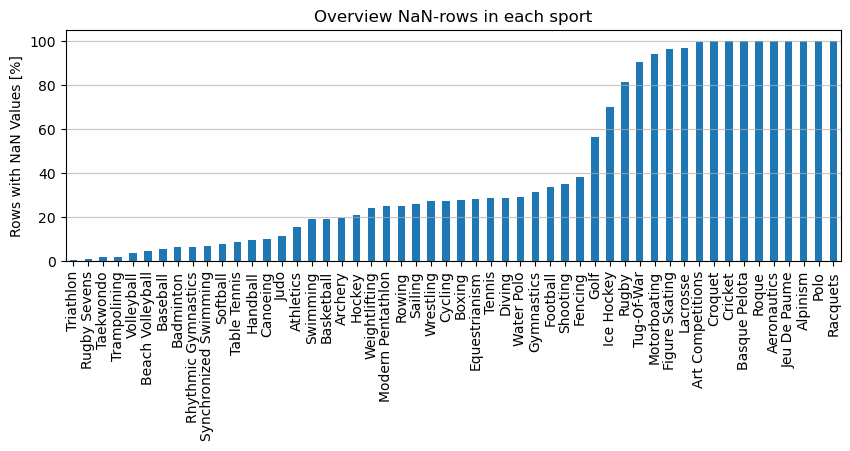

In [104]:
nan_series = pd.Series(dict_nan_rows_percentage).sort_values()
fig,ax = plt.subplots(figsize=(10,3))
nan_series.plot(kind='bar', ax=ax)
ax.set_ylabel('Rows with NaN Values [%]')
ax.set_title('Overview NaN-rows in each sport')
ax.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

Some sports like 'Alpinism', 'Aeronautics' and 'Racquets' have 100% NaN-rows! It is a big hint for a proper analysis in this specific sport. One could consider removing these sports.

In [105]:
# Are there medals in NaN-rows?

data[(data['Medal'] != 0) & (data['nan_row'] > 0)].groupby('Sport')['Medal'].count().sort_values(ascending=False)


Sport
Gymnastics               1039
Rowing                    734
Shooting                  638
Fencing                   597
Swimming                  547
Sailing                   544
Football                  453
Cycling                   399
Hockey                    360
Wrestling                 319
Equestrianism             302
Athletics                 299
Water Polo                293
Boxing                    236
Art Competitions          154
Tennis                    149
Archery                   147
Rugby                     132
Canoeing                  124
Handball                  123
Weightlifting             112
Diving                    106
Tug-Of-War                 89
Basketball                 80
Polo                       67
Lacrosse                   58
Golf                       42
Modern Pentathlon          33
Figure Skating             25
Cricket                    24
Judo                       21
Badminton                  14
Volleyball                 11
Racq

In [106]:
# How many medals in nan-rows in addition?
nan_rows_medals = data[(data['Medal'] != 0) & (data['nan_row'] > 0)].groupby('Sport')['Medal'].count().sort_values(ascending=False).sum()
nan_rows_medals

8347

8347 athletes from 49 different sports with NaN-rows won medals. Maybe, it is not a good idea to delete NaN-rows for further analysis.

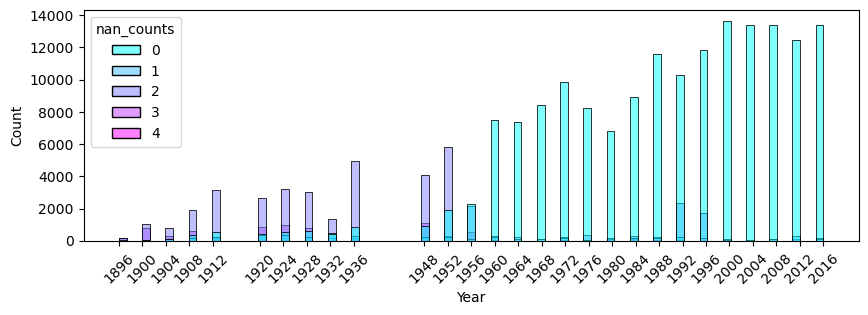

In [107]:
# histplot about years
fig2, ax = plt.subplots(figsize=(10, 3))
sns.histplot(x='Year', data=data, ax=ax, hue='nan_counts', palette='cool')
ax.set_xticks(sorted(data['Year'].unique()))
ax.set_xticklabels(sorted(data['Year'].unique()), rotation=45)
plt.show()

- Most samples are from the late 20th century. 
- During First and Second World Wars, we have no entries.
- The period covered by the dataset starts in 1896 and ends in 2016. 
- Since 1960 NaN-values there are only a few NaN-Values in dataset.

In [122]:
# Check for any duplicates
duplicates = data.duplicated(keep=False)
#duplicates.sum()
#data.head(5)

for i,d in enumerate(duplicates):
    if d == True:
        print(data.iloc[i])

ID                                       8683
Name                         Jacques Baudrier
Sex                                         M
Age                                      28.0
Height                                    NaN
Weight                                    NaN
NOC                                       FRA
Year                                     1900
Sport                                 Sailing
Event                      Sailing Mixed Open
Medal                                       0
country                                France
nan_counts                                  2
nan_row                                     1
event_male_female_mixed                 Mixed
Name: 23560, dtype: object
ID                                       8683
Name                         Jacques Baudrier
Sex                                         M
Age                                      28.0
Height                                    NaN
Weight                                    NaN
NOC    

There are 13 duplicates in the dataset that have to be deleted.

In [ ]:
# Delete duplicates; always keep first entry
data = data.drop_duplicates(keep='first')

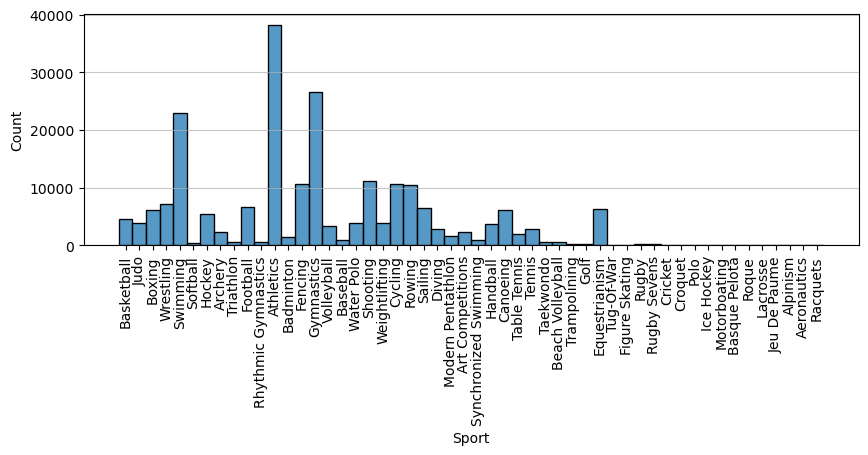

In [ ]:
# calculate number of athletes in each sport 
fig3,ax = plt.subplots(figsize=(10,3))
plt.grid(linestyle='-', alpha=0.7, axis='y')
sns.histplot(data=data, x='Sport', ax=ax)
plt.xticks(rotation=90)
plt.yticks()
plt.show()


The number of athletes in each sport varies significantly.

In [110]:
# Proportion of events for men, women and mixed -> pie

data['event_male_female_mixed'] = data['Event'].apply(lambda x: 'Male' if "Men's" in x else('Female' if "Women's" in x else 'Mixed'))

event_counts = data.groupby(['Year', 'event_male_female_mixed']).size().reset_index(name='count')






Most of events are for men

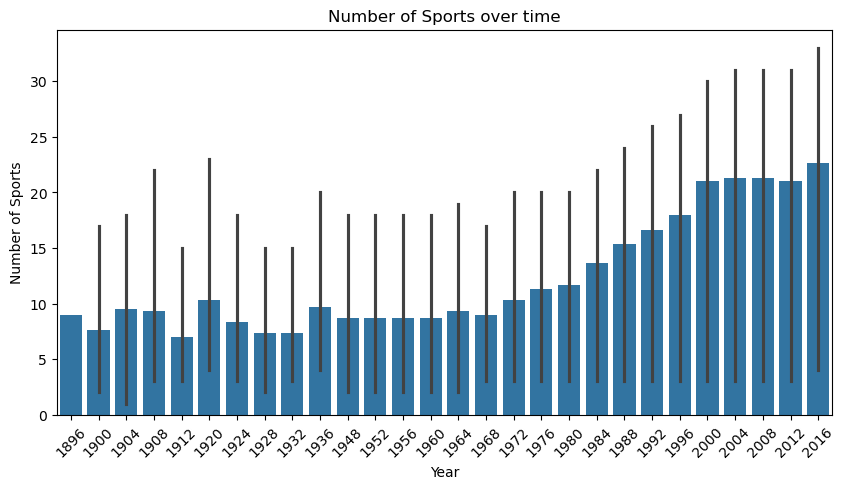

In [111]:
# Have some sports been discontinued or added over time?

number_sports_over_time = data[['Sport', 'Year', 'event_male_female_mixed']]

count_sports_each_year = number_sports_over_time.groupby(['Year', 'event_male_female_mixed'])['Sport'].nunique().reset_index()
count_sports_each_year.columns = ['Year', 'event_male_female_mixed', 'Number_of_Sports']
fig5, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=count_sports_each_year, x='Year', y='Number_of_Sports', ax=ax)
ax.set_title('Number of Sports over time')
ax.set_ylabel('Number of Sports')
plt.xticks(rotation=45)
plt.show()


Over time, more and more sports have been added. It's worth noting that, starting in 1976, the number of women's competitions in various sports rose sharply and has even surpassed the number of men's events since 2004.


Some sports were discontinued and some were added over time!


In [112]:
# Which sports were added and which were discontinued in each year?

sports_changes_over_time = data.groupby('Year')['Sport'].agg(set).reset_index()

changes_list = []

for i in range(1,len(sports_changes_over_time)):
    current_year = sports_changes_over_time.iloc[i]
    previous_year = sports_changes_over_time.iloc[i-1]

    # Comparison
    added = current_year['Sport'] - previous_year['Sport']
    removed = previous_year['Sport'] - current_year['Sport']

    # Add results in changes_list
    changes_list.append({
        'Year':current_year['Year'],
        'Added': list(added),
        'Removed': list(removed)
    })

# Transform list into dataframe
changes_df = pd.DataFrame(changes_list)

# Merge dataframes: changes_df -> sports_changes_over_time
sports_changes_over_time = pd.merge(sports_changes_over_time, changes_df, on='Year', how='left')
changes_df

,Year,Added,Removed
0,1900,"[Rowing, Water Polo, Football, Archery, Croque...","[Wrestling, Weightlifting]"
1,1904,"[Wrestling, Diving, Weightlifting, Boxing, Lac...","[Croquet, Cricket, Basque Pelota, Shooting, Sa..."
2,1908,"[Sailing, Hockey, Figure Skating, Jeu De Paume...","[Golf, Roque, Weightlifting]"
3,1912,"[Equestrianism, Art Competitions, Modern Penta...","[Hockey, Archery, Figure Skating, Boxing, Jeu ..."
4,1920,"[Hockey, Archery, Weightlifting, Figure Skatin...",[]
5,1924,[],"[Hockey, Archery, Figure Skating, Tug-Of-War, ..."
6,1928,[Hockey],"[Rugby, Tennis, Polo, Shooting]"
7,1932,"[Alpinism, Shooting]",[Football]
8,1936,"[Handball, Football, Canoeing, Aeronautics, Po...",[]
9,1948,[],"[Aeronautics, Polo, Alpinism, Handball]"


In [113]:
# In which sports women's events have been added?
data

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Event,Medal,country,nan_counts,nan_row,event_male_female_mixed
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Basketball,Basketball Men's Basketball,0,China,0,0,Male
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Judo,Judo Men's Extra-Lightweight,0,China,0,0,Male
2,602,Abudoureheman,M,22.0,182.0,75.0,CHN,2000,Boxing,Boxing Men's Middleweight,0,China,0,0,Male
3,1463,Ai Linuer,M,25.0,160.0,62.0,CHN,2004,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",0,China,0,0,Male
4,1464,Ai Yanhan,F,14.0,168.0,54.0,CHN,2016,Swimming,Swimming Women's 200 metres Freestyle,0,China,0,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219080,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,LES,2008,Athletics,Athletics Women's Marathon,0,Lesotho,0,0,Female
219081,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,LES,2012,Athletics,Athletics Women's Marathon,0,Lesotho,0,0,Female
219082,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,LES,1996,Athletics,Athletics Women's 4 x 100 metres Relay,0,Lesotho,2,1,Female
219083,122215,Lefa Tsapi,M,23.0,170.0,63.0,LES,1984,Boxing,Boxing Men's Welterweight,0,Lesotho,0,0,Male


In [114]:
data[['country', 'Sport']]

,country,Sport
0,China,Basketball
1,China,Judo
2,China,Boxing
3,China,Wrestling
4,China,Swimming
...,...,...
219080,Lesotho,Athletics
219081,Lesotho,Athletics
219082,Lesotho,Athletics
219083,Lesotho,Boxing


In [115]:
data[data['Name'] == 'Andreas Wecker'].head(3)

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Event,Medal,country,nan_counts,nan_row,event_male_female_mixed
106307,129196,Andreas Wecker,M,22.0,160.0,62.0,GER,1992,Gymnastics,Gymnastics Men's Individual All-Around,0,Germany,0,0,Male
106308,129196,Andreas Wecker,M,22.0,160.0,62.0,GER,1992,Gymnastics,Gymnastics Men's Team All-Around,0,Germany,0,0,Male
106309,129196,Andreas Wecker,M,22.0,160.0,62.0,GER,1992,Gymnastics,Gymnastics Men's Floor Exercise,0,Germany,0,0,Male


In [116]:
physical_characteristics = data[['ID', 'Age', 'Height', 'Weight']]
athlete = data[['ID', 'Name', 'country', 'NOC', 'Sex', 'Sport']]
competition = data[['ID', 'Event', 'Year', 'Medal']]

physical_characteristics.to_csv('physical_characteristics.csv', index=False)
athlete.to_csv('athlete.csv', index=False)
competition.to_csv('competition.csv', index=False)

In [117]:
athletes = pd.read_csv('athletes.csv', delimiter=';')
athletes_event = pd.read_csv('athletes_events.csv', delimiter=';')
events = pd.read_csv('events.csv', delimiter=';')
events

,Event_ID,Sport,Event
0,1,Aeronautics,Aeronautics Mixed Aeronautics
1,2,Alpinism,Alpinism Mixed Alpinism
2,3,Archery,"Archery Men's Au Chapelet, 33 metres"
3,4,Archery,"Archery Men's Au Chapelet, 50 metres"
4,5,Archery,"Archery Men's Au Cordon Dore, 33 metres"
...,...,...,...
625,626,Wrestling,"Wrestling Women's Flyweight, Freestyle"
626,627,Wrestling,"Wrestling Women's Heavyweight, Freestyle"
627,628,Wrestling,"Wrestling Women's Light-Heavyweight, Freestyle"
628,629,Wrestling,"Wrestling Women's Lightweight, Freestyle"


##### **Special Analysis for Dashboard**

In [118]:
# Which sports were added and which were discontinued in each year? Amount of sports each year?

# Grouping by Year and aggregating the set of sports
sports_changes_over_time = data.groupby('Year')['Sport'].agg(set).reset_index()

changes_list = []

for i in range(len(sports_changes_over_time)):
    current_year = sports_changes_over_time.iloc[i]

    # Count the number of sports in the current year
    count = len(current_year['Sport'])

    # Initialize added and removed sets
    added = set()
    removed = set()

    if i > 0:  # Check if it's not the first year
        previous_year = sports_changes_over_time.iloc[i-1]

        # Calculate added and removed sports
        added = current_year['Sport'] - previous_year['Sport']
        removed = previous_year['Sport'] - current_year['Sport']

    # Add results to changes_list
    changes_list.append({
        'Year': current_year['Year'],
        'Count': count,
        'Added': list(added),
        'Removed': list(removed)
    })

# Transform list into dataframe
changes_df = pd.DataFrame(changes_list)

# Merge dataframes: changes_df -> sports_changes_over_time
sports_changes_over_time = pd.merge(sports_changes_over_time, changes_df, on='Year', how='left')

# Display the final changes_df
changes_df


,Year,Count,Added,Removed
0,1896,9,[],[]
1,1900,20,"[Rowing, Water Polo, Football, Archery, Croque...","[Wrestling, Weightlifting]"
2,1904,18,"[Wrestling, Diving, Weightlifting, Boxing, Lac...","[Croquet, Cricket, Basque Pelota, Shooting, Sa..."
3,1908,24,"[Sailing, Hockey, Figure Skating, Jeu De Paume...","[Golf, Roque, Weightlifting]"
4,1912,17,"[Equestrianism, Art Competitions, Modern Penta...","[Hockey, Archery, Figure Skating, Boxing, Jeu ..."
5,1920,25,"[Hockey, Archery, Weightlifting, Figure Skatin...",[]
6,1924,20,[],"[Hockey, Archery, Figure Skating, Tug-Of-War, ..."
7,1928,17,[Hockey],"[Rugby, Tennis, Polo, Shooting]"
8,1932,18,"[Alpinism, Shooting]",[Football]
9,1936,24,"[Handball, Football, Canoeing, Aeronautics, Po...",[]


In [119]:
# Analysis of participating countries over time

# Grouping by Year and aggregating the set of countries
participants_changes_over_time = data.groupby('Year')['country'].agg(set).reset_index()

changes_list_part = []

for i in range(len(participants_changes_over_time)):
    current_year = participants_changes_over_time.iloc[i]

    # Count the number of participating countries in the current year
    count = len(current_year['country'])

    # Initialize added and removed sets
    added = set()
    removed = set()

    if i > 0:  # Check if it's not the first year
        previous_year = participants_changes_over_time.iloc[i-1]

        # Calculate added and removed sports
        added = current_year['country'] - previous_year['country']
        removed = previous_year['country'] - current_year['country']

    # Add results to changes_list
    changes_list_part.append({
        'Year': current_year['Year'],
        'Count': count,
        'Added': list(added),
        'Removed': list(removed)
    })

# Transform list into dataframe
changes_df_partic = pd.DataFrame(changes_list_part)

# Merge dataframes: changes_df -> sports_changes_over_time
participants_changes_over_time = pd.merge(participants_changes_over_time, changes_df_partic, on='Year', how='left')

# Display the final changes_df
changes_df_partic


,Year,Count,Added,Removed
0,1896,12,[],[]
1,1900,31,"[New Zealand, Colombia, Cuba, India, Luxembour...",[]
2,1904,14,[South Africa],"[Denmark, Mexico, Haiti, Romania, Netherlands,..."
3,1908,22,"[Denmark, Netherlands, Russia, Iceland, Sweden...",[Cuba]
4,1912,29,"[Poland, Chile, Serbia, Turkey, nan, Portugal,...",[Argentina]
5,1920,29,"[Egypt, Monaco, New Zealand, India, Estonia, B...","[Poland, Turkey, nan, Russia, Iceland, Hungary..."
6,1924,45,"[Ireland, Uruguay, Mexico, Bulgaria, Ecuador, ...",[]
7,1928,46,"[Zimbabwe, Germany, Malta, Panama]","[Ecuador, Russia, Brazil]"
8,1932,47,"[Guatemala, Colombia, Venezuela, El Salvador, ...","[Egypt, Panama, Chile, Lithuania, Zimbabwe, Ma..."
9,1936,49,"[Egypt, Boliva, Chile, Iceland, Afghanistan, B...","[Ireland, Haiti, Guatemala, Cuba, Venezuela, E..."


In [120]:
# Which countries won in which year which medals?

filtered_medal = data[data['Medal'] != 0]

medal_counts = filtered_medal.groupby(['Year', 'country', 'Sport'])['Medal'].count().reset_index()
medal_counts

,Year,country,Sport,Medal
0,1896,Australia,Athletics,2
1,1896,Australia,Tennis,1
2,1896,Austria,Cycling,3
3,1896,Austria,Swimming,2
4,1896,Denmark,Fencing,1
...,...,...,...,...
5647,2016,Uzbekistan,Wrestling,3
5648,2016,Venezuela,Athletics,1
5649,2016,Venezuela,Boxing,1
5650,2016,Venezuela,Cycling,1


In [121]:
#data[(data['Year'] == 1896) & (data['country'] == 'Australia')]

